In [1]:
import pandas as pd 
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
bs =load_breast_cancer()
bs.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
bs.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
df = pd.DataFrame(bs.data, columns = bs.feature_names)
df['target'] = bs.target

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
#for linear regression and scaling
scaler = StandardScaler()

In [18]:
X = df[['mean texture','mean area','mean compactness', 'mean fractal dimension']]

In [26]:
x = X.iloc[:,:-1]
y = X.iloc[:,-1]

In [27]:
x.head()

,mean texture,mean area,mean compactness
0,10.38,1001.0,0.27760
1,17.77,1326.0,0.07864
2,21.25,1203.0,0.15990
3,20.38,386.1,0.28390
4,14.34,1297.0,0.13280


In [28]:
X_scaled = scaler.fit_transform(x)

In [29]:
print(X_scaled)

[[-2.07333501  0.9843749   3.28351467]
 [-0.35363241  1.90870825 -0.48707167]
 [ 0.45618695  1.55888363  1.05292554]
 ...
 [ 2.0455738   0.57795264 -0.03867967]
 [ 2.33645719  1.73521799  3.27214378]
 [ 1.22179204 -1.34778924 -1.15075248]]


In [31]:
X_train,X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [32]:
mr = LinearRegression()
mr.fit(X_train, y_train)

LinearRegression()

In [33]:
ypred = mr.predict(X_test)

In [34]:
print(y_test)

204    0.06373
70     0.05461
131    0.05796
431    0.07102
540    0.06782
        ...   
486    0.05355
75     0.05391
249    0.06168
238    0.06129
265    0.05674
Name: mean fractal dimension, Length: 114, dtype: float64


In [35]:
print(ypred)

[0.06562789 0.05544718 0.06371534 0.06923447 0.06810488 0.0745954
 0.06199997 0.06043407 0.07149242 0.05747324 0.0571171  0.05791856
 0.05578583 0.06303277 0.06120068 0.06447264 0.05614736 0.0640724
 0.06740153 0.06193898 0.06732115 0.06521647 0.06473839 0.05934947
 0.05959173 0.06534367 0.06282951 0.06309598 0.06203888 0.06815464
 0.06361005 0.06007461 0.06550876 0.0603226  0.06558643 0.06017562
 0.055443   0.05907481 0.05770836 0.05977985 0.06512109 0.06025141
 0.06843512 0.06168929 0.06217578 0.0614376  0.07162889 0.06037425
 0.06497089 0.06422164 0.05664712 0.06648815 0.06983508 0.06363633
 0.06988049 0.05903316 0.06891592 0.06487662 0.06672023 0.06393239
 0.06403319 0.06164088 0.05186627 0.05533646 0.05771492 0.06084434
 0.06951274 0.08427861 0.06017306 0.0659152  0.0662503  0.06432883
 0.05731306 0.06664447 0.06191376 0.0665051  0.0588885  0.06687928
 0.0610206  0.06842298 0.06333742 0.05967192 0.06202669 0.05908216
 0.05280267 0.07801796 0.08203931 0.06977517 0.06578716 0.063750

In [36]:
c = mr.intercept_
print(c)

0.06282767029062497


In [37]:
m = mr.coef_
print(m)

[-0.00055227 -0.00513409  0.00671329]


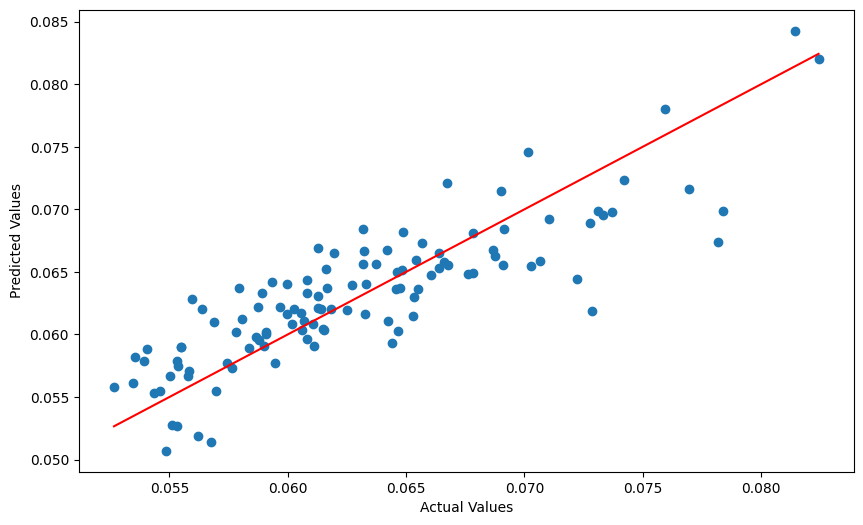

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, ypred)
line_range = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line_range, line_range, color='red', label='Perfect Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

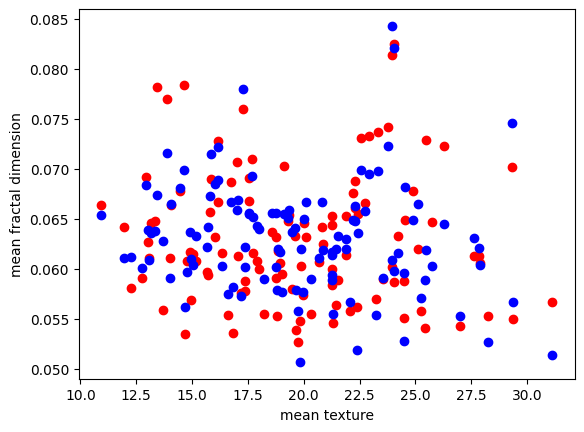

In [40]:
plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test, color = 'red')
plt.scatter(scaler.inverse_transform(X_test)[:,0], ypred,  color = 'blue')
plt.xlabel('mean texture')
plt.ylabel('mean fractal dimension')
plt.show()


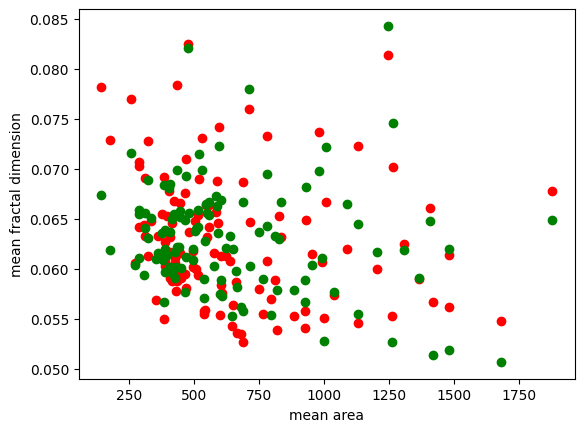

In [41]:
plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test, color = 'red')
plt.scatter(scaler.inverse_transform(X_test)[:,1], ypred,  color = 'green')
plt.xlabel('mean area')
plt.ylabel('mean fractal dimension')
plt.show()


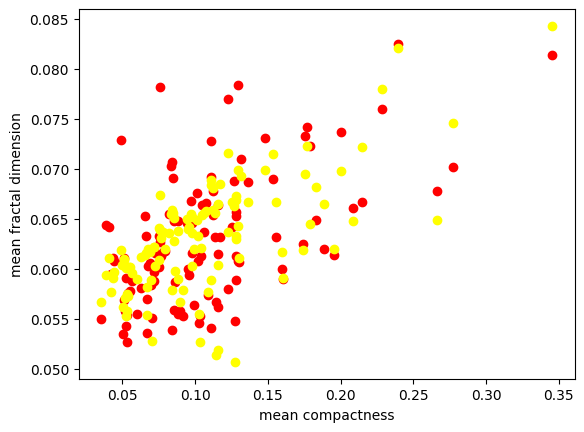

In [42]:
plt.scatter(scaler.inverse_transform(X_test)[:,2], y_test, color = 'red')
plt.scatter(scaler.inverse_transform(X_test)[:,2], ypred,  color = 'yellow')
plt.xlabel('mean compactness')
plt.ylabel('mean fractal dimension')
plt.show()

In [43]:
#performance metrics
r2_score(y_test, ypred)

0.7222725327838084

In [44]:
r2 = mr.score(X_train, y_train)
print('coeffecient of determination : ', r2)
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
sse = np.sum((y_test-ypred)**2)
print('mean absolute error is:', mae)
print('mean square error is:', mse)
print('root mean square error is:', rmse)
print('sum of squared error is: ', sse)


coeffecient of determination :  0.7529360065335842
mean absolute error is: 0.002670953427588188
mean square error is: 1.1477914569882023e-05
root mean square error is: 0.0033879071076229382
sum of squared error is:  0.0013084822609665506
